<a href="https://colab.research.google.com/github/thiago2608santana/Analise_Series_Temporais/blob/main/Prophet_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import datetime
from itertools import product
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

In [2]:
plt.rcParams['figure.figsize'] = (10, 7.5)

## Import Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Analise_Series_Temporais_Datasets/portland-oregon-average-monthly-.csv')

In [4]:
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [5]:
df['Month'] = df['Month'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m'))

In [6]:
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [7]:
df.columns = ['ds', 'y']

In [8]:
df.head()

,ds,y
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [9]:
df.tail()

,ds,y
109,1969-02-01,1425
110,1969-03-01,1419
111,1969-04-01,1432
112,1969-05-01,1394
113,1969-06-01,1327


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,114.0,1120.54386,270.888317,613.0,885.0,1158.0,1340.0,1558.0


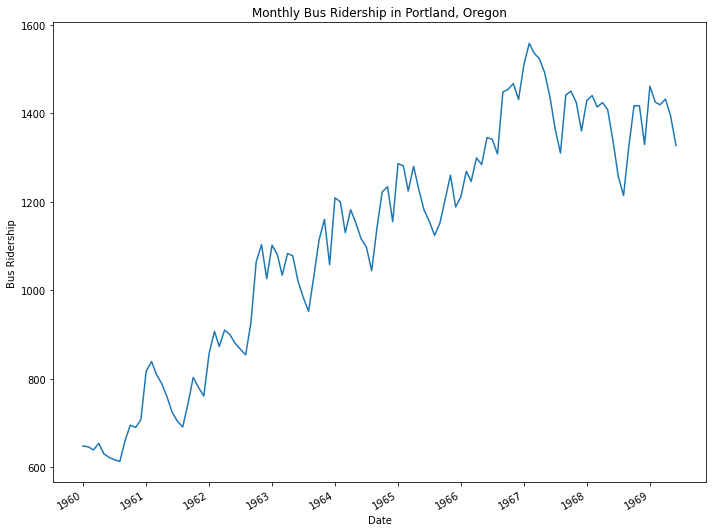

In [11]:
fig, ax = plt.subplots()
locator = mdates.AutoDateLocator()
ax.plot(df.ds, df.y)
ax.xaxis.set_major_locator(locator)
ax.set_xlabel('Date')
ax.set_ylabel('Bus Ridership')
ax.set_title('Monthly Bus Ridership in Portland, Oregon')
fig.autofmt_xdate()
plt.tight_layout()

## Hyperparameter Tuning

In [23]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

rmses = []

cutoffs = pd.date_range(start='1963-01-01', end='1968-06-01', freq='6MS')

for param in params:
    m = Prophet(**param)
    m.add_country_holidays(country_name='US')
    m.fit(df)
    
    df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    
tuning_results = pd.DataFrame(params)
tuning_results['rmse'] = rmses

best_params = params[np.argmin(rmses)]

print(best_params)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/1qfb5wzs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/27vtrio6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26706', 'data', 'file=/tmp/tmpsl7f4kbb/1qfb5wzs.json', 'init=/tmp/tmpsl7f4kbb/27vtrio6.json', 'output', 'file=/tmp/tmp8t63est7/prophet_model-20220818134745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:47:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:47:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
13:47:46 - cmdstanpy - ERROR - Chain [1] error: error during pr

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/ekitmmr8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/kl90znnv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74056', 'data', 'file=/tmp/tmpsl7f4kbb/ekitmmr8.json', 'init=/tmp/tmpsl7f4kbb/kl90znnv.json', 'output', 'file=/tmp/tmpuzd1k4rm/prophet_model-20220818134747.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:47:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:47:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/nr9v0zat.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/g9i7i1i1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/6ecyvans.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/nefqlffc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25488', 'data', 'file=/tmp/tmpsl7f4kbb/6ecyvans.json', 'init=/tmp/tmpsl7f4kbb/nefqlffc.json', 'output', 'file=/tmp/tmpivfgji_g/prophet_model-20220818134806.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:48:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:48:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/3vj018_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/7_yaaijm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/yxmrax6m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/g_wykog7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62570', 'data', 'file=/tmp/tmpsl7f4kbb/yxmrax6m.json', 'init=/tmp/tmpsl7f4kbb/g_wykog7.json', 'output', 'file=/tmp/tmp21xm7y17/prophet_model-20220818134825.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:48:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:48:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/cgnt2u9w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/8a2rzdg8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/wb3w4wk4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/1u05gq88.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15443', 'data', 'file=/tmp/tmpsl7f4kbb/wb3w4wk4.json', 'init=/tmp/tmpsl7f4kbb/1u05gq88.json', 'output', 'file=/tmp/tmp5wqm43_v/prophet_model-20220818134844.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:48:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:48:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/oamc90wf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/jiui7c0e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/ou_887nj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/3t5s9voh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4655', 'data', 'file=/tmp/tmpsl7f4kbb/ou_887nj.json', 'init=/tmp/tmpsl7f4kbb/3t5s9voh.json', 'output', 'file=/tmp/tmpfghr_ds4/prophet_model-20220818134906.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:49:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/zpl58zi6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/qloe3bdq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/tu6udevc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/r8nmf_uz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17554', 'data', 'file=/tmp/tmpsl7f4kbb/tu6udevc.json', 'init=/tmp/tmpsl7f4kbb/r8nmf_uz.json', 'output', 'file=/tmp/tmphpeiupx2/prophet_model-20220818134925.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:49:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/u4y1ehmx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/d15bm6lc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/t1k90yrf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/83081i__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46914', 'data', 'file=/tmp/tmpsl7f4kbb/t1k90yrf.json', 'init=/tmp/tmpsl7f4kbb/83081i__.json', 'output', 'file=/tmp/tmpswcr9zf1/prophet_model-20220818134945.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:49:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/okpwz2sf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/3xg50o74.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/p7wyp42h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/18_p3_ps.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80855', 'data', 'file=/tmp/tmpsl7f4kbb/p7wyp42h.json', 'init=/tmp/tmpsl7f4kbb/18_p3_ps.json', 'output', 'file=/tmp/tmpt877ntx4/prophet_model-20220818135005.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:50:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:50:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/tegv72j8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/uh9cbc84.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/2dusdyai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/a2ahem53.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87838', 'data', 'file=/tmp/tmpsl7f4kbb/2dusdyai.json', 'init=/tmp/tmpsl7f4kbb/a2ahem53.json', 'output', 'file=/tmp/tmpwz0oy9ok/prophet_model-20220818135024.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:50:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:50:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/r_tbwemq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/baggp4jg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/0apgnge7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/16z0e31n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56958', 'data', 'file=/tmp/tmpsl7f4kbb/0apgnge7.json', 'init=/tmp/tmpsl7f4kbb/16z0e31n.json', 'output', 'file=/tmp/tmpxy5jrbxf/prophet_model-20220818135045.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:50:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:50:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/c06xdsz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/tlxz1tj3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/itl4inzf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/fkreviaw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22700', 'data', 'file=/tmp/tmpsl7f4kbb/itl4inzf.json', 'init=/tmp/tmpsl7f4kbb/fkreviaw.json', 'output', 'file=/tmp/tmpocnxrk9y/prophet_model-20220818135108.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:51:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:51:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/seygxxx5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/eoge86nr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/8plovbd4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/t_yrssfl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58188', 'data', 'file=/tmp/tmpsl7f4kbb/8plovbd4.json', 'init=/tmp/tmpsl7f4kbb/t_yrssfl.json', 'output', 'file=/tmp/tmpx452ma4p/prophet_model-20220818135129.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:51:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:51:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/xshyn6z5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/p21rsmnb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/6l8d_b5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/ukja1mzp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7609', 'data', 'file=/tmp/tmpsl7f4kbb/6l8d_b5o.json', 'init=/tmp/tmpsl7f4kbb/ukja1mzp.json', 'output', 'file=/tmp/tmpvioo434v/prophet_model-20220818135152.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:51:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:51:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/l5x2k3yk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/6m2q51oa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/p_yloquc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/qgfg1m9q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45565', 'data', 'file=/tmp/tmpsl7f4kbb/p_yloquc.json', 'init=/tmp/tmpsl7f4kbb/qgfg1m9q.json', 'output', 'file=/tmp/tmphrkgves0/prophet_model-20220818135214.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:52:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:52:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/2psxwl94.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/t972m_03.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/1r3bhip8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/dc5el437.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44268', 'data', 'file=/tmp/tmpsl7f4kbb/1r3bhip8.json', 'init=/tmp/tmpsl7f4kbb/dc5el437.json', 'output', 'file=/tmp/tmpo5gbzo3n/prophet_model-20220818135327.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:53:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/pkszqqck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/dg7b8xsy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/f4jh0ukr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/8zqolxc5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27647', 'data', 'file=/tmp/tmpsl7f4kbb/f4jh0ukr.json', 'init=/tmp/tmpsl7f4kbb/8zqolxc5.json', 'output', 'file=/tmp/tmpg9cgr67a/prophet_model-20220818135426.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:54:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:54:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/6vjf944a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/2a0m7b6a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1}


## Fit Best Model

In [24]:
m = Prophet(
    changepoint_prior_scale=0.01,
    seasonality_prior_scale=0.01
)
m.add_country_holidays(country_name='US')
m.fit(df);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/oqfyc77h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/u3au5f1n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48418', 'data', 'file=/tmp/tmpsl7f4kbb/oqfyc77h.json', 'init=/tmp/tmpsl7f4kbb/u3au5f1n.json', 'output', 'file=/tmp/tmpvu1wjn9r/prophet_model-20220818135630.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:56:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:56:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Make Forecasts

In [25]:
future = m.make_future_dataframe(periods=12, freq='M')
future.tail()

,ds
121,1970-01-31
122,1970-02-28
123,1970-03-31
124,1970-04-30
125,1970-05-31


In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
121,1970-01-31,1648.736473,1533.635603,1756.574791
122,1970-02-28,1627.335441,1518.202960,1742.705505
123,1970-03-31,1651.455884,1534.300184,1758.556516
124,1970-04-30,1633.900631,1522.361845,1751.959032
125,1970-05-31,1611.134599,1503.382456,1723.443612


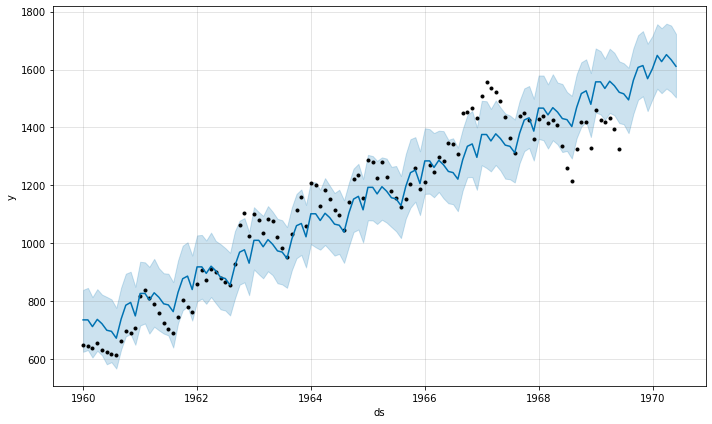

In [27]:
forecast_fig = m.plot(forecast)

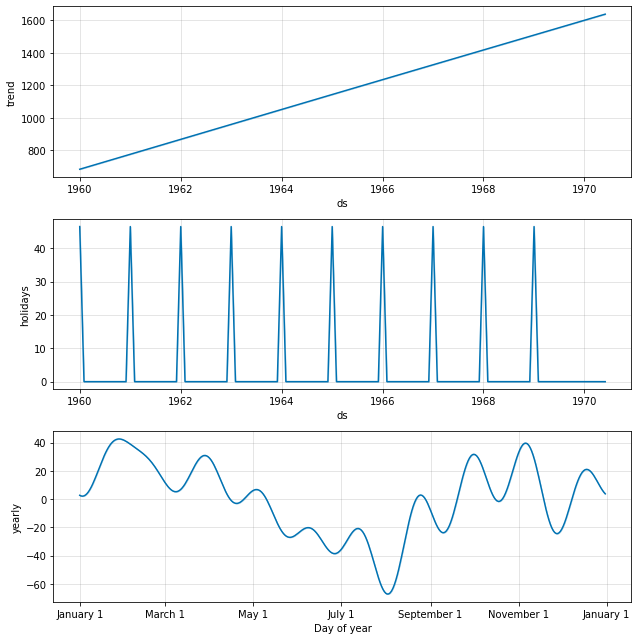

In [28]:
components_fig = m.plot_components(forecast)

## Performance Metrics

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/air3dlpd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/4ovzykt3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93974', 'data', 'file=/tmp/tmpsl7f4kbb/air3dlpd.json', 'init=/tmp/tmpsl7f4kbb/4ovzykt3.json', 'output', 'file=/tmp/tmpzm246exu/prophet_model-20220818135755.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:57:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:57:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/_u7h8s0p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsl7f4kbb/mrgv4c7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pac

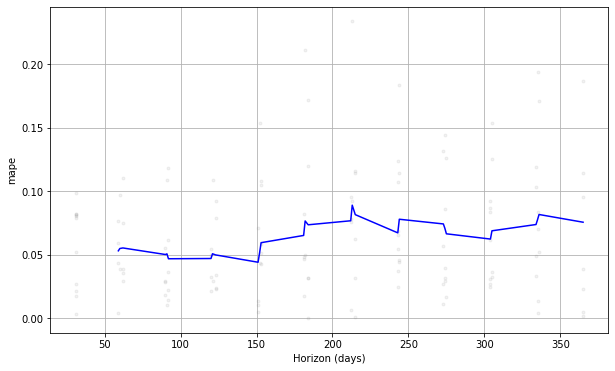

In [29]:
df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
df_p = performance_metrics(df_cv)

fig = plot_cross_validation_metric(df_cv, metric='mape')